# 04 - 图形因果模型


## 思考因果关系

你是否注意到 YouTube 视频中的厨师们多么擅长描述食物？“将酱汁收至丝绒般浓稠”。如果你是刚开始学做饭的菜鸟，根本不知道这是什么意思，只想问一句：到底要在锅里煮几分钟？因果推断也是一样的。假设你走进一家酒吧，刚好旁边是经济系，你听到一群人正在讨论因果性。他们可能在说：“因为收入的混杂因素，很难识别移民对这个社区的影响，所以我们用了工具变量。”到这时候，你可能根本听不懂他们在讲什么。但至少从现在开始，我会帮你把这些事情讲清楚一点。

图形模型是因果关系的语言。它们不仅是你与其他因果关系爱好者交流的工具，更能让你的思考过程更加清晰透明。

作为起点，我们以潜在结果的条件独立性为例。这是进行因果推断时需要满足的主要假设之一：

$
(Y_0, Y_1) \perp T | X
$

条件独立性使我们能够仅衡量处理对结果的影响，而不受其他潜在变量的干扰。经典的例子是药物对患病患者的效果。如果只有病情严重的患者接受药物治疗，甚至可能看起来服药反而降低了患者的健康水平。这是因为疾病严重程度的影响与药物效果混杂在一起。若我们将患者按病情严重与否分组，并在每个亚组中分析药物的影响，就能更清晰地了解实际效果。这种根据特征对人群进行分组的方法称为控制或条件化于 X。通过对重症病例进行条件化处理，治疗机制变得如同随机分配。在重症组内，患者是否接受药物仅由偶然性决定，而不再取决于病情严重程度，因为所有患者在这一维度上是相同的。而只要处理在组内是随机的，那我们就可以说：处理与潜在结果是条件独立的（conditionally independent）。

独立性和条件独立性是因果推断中的核心概念，但要真正理解它们的含义，其实并不容易。不过，如果我们用一种恰当的语言来描述这个问题，情况就会有所不同。这正是 **因果图模型（causal graphical models）** 发挥作用的地方。因果图模型提供了一种方式，用以表示“谁导致了谁”的因果结构，从而帮助我们更清晰地理解因果机制是如何运作的。

一个图模型看起来像这样

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

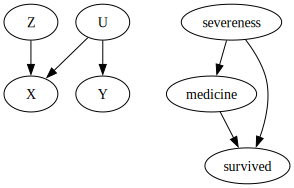

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

每个节点代表一个随机变量。我们用箭头或边来表示一个变量是否导致另一个变量。在上面的第一个图模型中，我们表示 Z 导致 X，而 U 同时导致 X 和 Y。举一个更具体的例子，我们可以将关于药物对患者生存影响的思考转化为上述第二个图。病情严重程度同时影响药物使用和生存率，而药物使用也直接影响生存率。正如我们将看到的，这些因果图模型的语言将有助于使我们对因果关系的思考更加清晰，因为它阐明了我们对世界运作方式的信念。

## 因果图模型速成

关于图形模型，有[整整一学期的课程](https://www.coursera.org/specializations/probabilistic-graphical-models)专门讲解。但就我们目前的目的而言，最重要的是：我们必须清楚图形模型中所隐含的“独立性”和“条件独立性”假设。正如我们即将看到的，独立性在图形模型中的传播，就像水在溪流中流动一样。我们可以通过对变量的处理，阻断或开启这种“因果信息的流动”。为了理解这一点，我们将考察一些常见的图形结构和例子。它们看起来会非常直观，但足以作为构建理解的基石，让我们掌握图形模型中关于独立性与条件独立性的所有核心概念。

首先，看这个非常简单的图。A 导致 B，B 导致 C。或者说 X 导致 Y，Y 导致 Z。

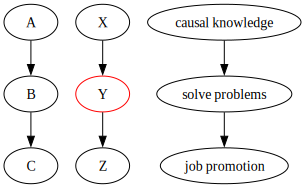

In [6]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

在第一幅图中，依赖关系沿箭头方向流动。需注意的是，依赖关系是对称的，尽管这一点稍显反直觉。举个更具体的例子，假设了解因果推断是解决商业问题的唯一途径，而解决这些问题又是获得职位晋升的唯一方式。因此，因果知识意味着能解决导致晋升的问题。这里我们可以说，职位晋升依赖于因果知识。因果专业知识越丰富，获得晋升的机会就越大。同样，晋升机会越大，拥有因果知识的可能性也越高。否则，晋升将变得困难。

现在，假设我对中介变量进行条件化处理。在这种情况下，依赖关系被阻断。因此，给定 Y 时，X 与 Z 相互独立。在上图中，红色表示 Y 是一个被条件化的变量。同理，在我们的例子中，如果我知道你擅长解决问题，那么了解你掌握因果推断的知识并不会为你获得职位晋升的机会提供更多信息。用数学术语表达就是 $E[Promotion|Solve \ problems, Causal \ knowledge]=E[Promotion|Solve \ problems]$。反之亦然；一旦我知道你解决问题的能力如何，了解你的晋升状况并不能让我进一步获知你掌握因果推断的可能性。

一般而言，当我们对中介变量 B 进行条件化时，从 A 到 C 的直接路径中的依赖流会被阻断。或者说，

$A \not \perp C$

以及

$
A \perp C | B
$

现在，让我们考虑一个分叉结构。同一个变量在图的下游引起另外两个变量。这种情况下，依赖关系会沿着箭头反向流动，形成一条**后门路径**。我们可以通过对共同原因进行条件化来关闭后门路径，从而切断依赖关系。

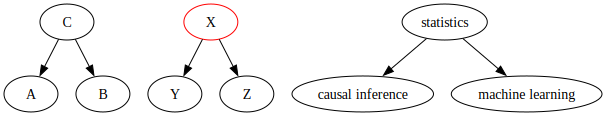

In [8]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

举例来说，假设你对统计学的了解使你在因果推断和机器学习方面更为精通。若我不清楚你的统计学水平，那么得知你擅长因果推断会提高我认为你也擅长机器学习的概率。这是因为即便我不了解你的统计学知识程度，也能从你的因果推断能力中推断出来。如果你精于因果推断，很可能统计学也相当扎实，从而更有可能在机器学习领域表现优异。

现在，若以你的统计学知识水平为条件，那么你对机器学习的了解程度就与对因果推断的掌握相互独立。知晓你的统计学水平已为我提供了推断你机器学习技能所需的全部信息。可见，在这种情况下，了解你的因果推断能力不会带来额外信息。

一般而言，具有共同原因的两个变量是相互依赖的，但当我们以该共同原因为条件时，它们便相互独立。或者说

$A \not \perp  B$

和

$
A \perp B | C
$

唯一缺失的结构是对撞节点。对撞节点指的是两个箭头交汇于同一个变量的情况。可以说，在这种情况下，这两个变量共享一个共同的影响结果。

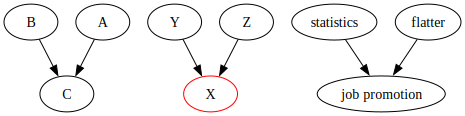

In [10]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

举例来说，假设有两种方式可以获得职位晋升：要么擅长统计学，要么善于奉承上司。如果我不以你是否获得晋升为条件，即我对你是否会晋升一无所知，那么你的统计学水平和奉承能力是相互独立的。换句话说，了解你在统计学上的造诣并不能告诉我你奉承上司的水平如何。然而，一旦你确实获得了晋升，情况就截然不同——知道你的统计学水平就能推断出你的奉承能力。如果你统计学能力欠佳却仍获得晋升，那么你很可能是精通奉承之道；反之则难以晋升。同样地，若你不善奉承，则必然在统计学方面表现优异。这种现象有时被称为 **“解释消除”** ，因为一个原因已经充分解释了结果，使得另一个原因的可能性降低。

一般而言，对撞子条件化会打开依赖路径，不对其条件化则保持路径关闭。或者

$A \perp B$

并且

$
A \not \perp B | C
$

了解这三种结构后，我们可以推导出一条更为普遍的规则：路径被阻断当且仅当：
1. 路径中包含一个已被条件化的非对撞子
2. 它包含一个未被条件化且其后代也未被条件化的对撞变量。

这里有一份关于图中依赖流向的速查表，我摘自 Mark Paskin 在[斯坦福大学的演讲](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf)。箭头末端带横线表示独立关系，不带横线的箭头则表示依赖关系。

![img](images/04/graph-flow.png)

作为最后一个示例，尝试分析以下因果图中的一些独立与依赖关系。
1. Is $D \perp C$?
2. Is $D \perp C| A $ ?
3. Is $D \perp C| G $ ?
4. Is $A \perp F $ ?
5. Is $A \perp F|E $ ?
6. Is $A \perp F|E,C $ ?

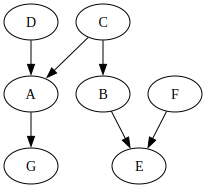

In [12]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**答案**:
1. $D \perp C$。它包含了一个未被控制的对撞变量。
2. $D \not\perp C| A $ 。它包含了一个已被控制的对撞变量。
3. $D \not\perp C| G $。它包含了一个已被条件化的对撞因子（collider）的后代。此处可将 G 视为 A 的某种代理变量。
4. $A \perp F $。它包含了一个未被条件化的对撞因子 B->E<-F。
5. $A \not\perp F|E $。它包含了一个已被条件化的对撞因子 B->E<-F。
6. $A \perp F|E, C $ 。它包含了一个已被条件化的对撞因子 B->E<-F，但同时存在一个被条件化的非对撞因子。对 E 进行条件化会打开路径，而对 C 进行条件化则会再次关闭该路径。

了解因果图模型能让我们认识到因果推断中出现的问题。正如所见，这些问题归根结底都源于偏误。

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

图形模型帮助我们诊断所面临的偏误类型，并确定纠正这些偏误所需的工具。

## 混杂偏误

![img](./images/04/both_crap.png)

偏误的首要重要原因是混杂因素。当处理因素与结果存在共同原因时，就会发生这种情况。例如，假设处理因素是教育程度，结果是收入水平。由于两者共享一个共同原因——智力水平，我们很难确定教育对工资的因果效应。因此可以认为，受教育程度更高的人收入更高仅是因为他们更聪明，而非接受了更多教育。要识别真正的因果效应，必须阻断处理因素与结果之间的所有后门路径。这样处理后，唯一剩下的效应就是直接效应 T→Y。在上述例子中，若我们控制智力变量（即比较智力水平相同但教育程度不同的群体），结果的差异将仅源于教育程度的差别，因为所有人的智力水平都相同。纠正混杂偏误需要控制处理因素与结果的所有共同原因。

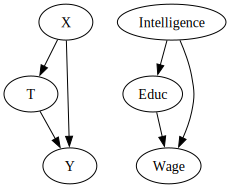

In [14]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

遗憾的是，并非总能控制所有常见因素。有时存在未知因素或我们无法衡量的已知因素，智力便是后者之一。尽管科学家们付出诸多努力，至今仍未找到准确衡量智力的方法。此处我将用 U 表示未测量的变量。现在假设智力无法直接影响教育程度——它虽影响 SAT 成绩，但决定教育水平的是 SAT 分数，因为高分能打开优质大学的大门。即便我们无法控制不可测量的智力因素，通过控制 SAT 分数仍可阻断这条后门路径。

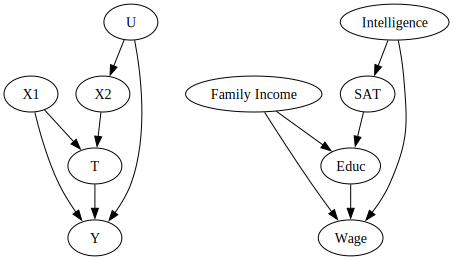

In [16]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

在下述图表中，以 X1 和 X2（即 SAT 分数与家庭收入）为条件，足以阻断处理变量与结果之间所有后门路径。换言之，$(Y_0, Y_1) \perp T | X1, X2$。因此，即便无法测量所有共同原因，只要控制那些可观测变量——它们能中介未测量变量对处理的影响——仍可实现条件独立性。需注意，此处还存在 $(Y_0, Y_1) \perp T | X1, U$，但由于 U 不可观测，我们无法以其为条件。

但若非如此呢？倘若未测量变量直接同时影响处理变量与结果会怎样？在接下来的示例中，智力因素同时影响教育程度与收入水平，导致教育（处理变量）与工资（结果变量）间存在混杂。这种情况下，由于混杂因子不可测量，我们无法直接控制它。然而，其他可测变量可作为混杂因子的代理变量——这些变量虽不在后门路径上，但控制它们有助于降低偏误（尽管不能完全消除）。这类变量有时被称为替代混杂因子。

在我们的示例中，虽然无法直接测量智力水平，但可以测量其部分成因（如父母的教育程度）及部分表现（如智商或 SAT 分数）。控制这些替代变量虽不足以完全消除偏误，却有所助益。

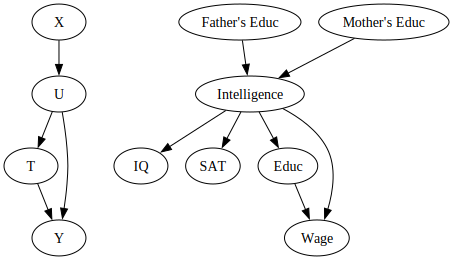

In [18]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## 选择偏误

或许您认为将所有可测量的变量纳入模型是避免混淆偏误的好方法。然而，请三思而行。

![image.png](./images/04/selection_bias.png)

第二个重要的偏误来源是我们所称的选择偏误。在此，我认为区分它与混淆偏误是有建设性的，因此我将坚持这一区分。如果说混淆偏误发生在我们未能控制一个共同原因时，那么选择偏误更多与效应相关。这里需要提醒的是，经济学家倾向于将所有类型的偏误都称为选择偏误。

通常情况下，选择偏误发生在我们控制了过多变量时。可能出现的情况是，处理与潜在结果在边际上独立，但一旦我们以对撞机为条件，它们就变得相互依赖。

设想一下，借助某种奇迹，你终于能够随机分配教育以衡量其对工资的影响。但为了确保没有混淆因素，你控制了许多变量，其中包括投资。然而，投资并非教育与工资的共同原因，而是两者的结果。受教育程度更高的人不仅收入更多，投资也更多；同样，收入更高的人投资也更多。由于投资是一个碰撞变量，通过对其加以控制，你实际上在治疗与结果之间开辟了第二条路径，这将使得直接效应的测量变得更加困难。一种理解方式是，通过控制投资，你观察的是投资相同的小群体，然后在这些群体中寻找教育的影响。但这样做时，你也在无意间间接限制了工资的应有变化。结果，你将无法看清教育如何改变工资，因为你阻止了工资按照其自然规律变动。

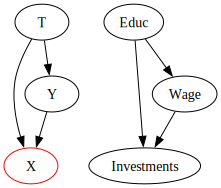

In [20]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

假设投资与教育仅取两个值以说明此情形：人们要么投资，要么不投资；他们要么受过教育，要么没有。最初，当我们不控制投资变量时，由于教育是随机分配的，偏误项为零（$E[Y_0|T=1] - E[Y_0|T=0] = 0$ ）。这意味着无论是否接受教育干预，人们未受教育时的工资（$Wage_0$）是相同的。但若我们以投资为条件进行观察，会发生什么？

观察那些进行投资的人群，很可能存在 $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$的情况。换言之，在投资者中，那些无需教育也能成功投资的人更可能获得高收入，无论其教育水平如何。因此，这些人的工资 $Wage_0|T=0$ 很可能高于受过教育群体若未受教育时的工资 $Wage_0|T=1$。类似逻辑适用于不投资者群体，我们很可能同样发现 $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$。那些即使受过教育也不投资的人，若未获得教育，其工资可能低于未受教育也未投资的群体。

从纯图形论证的角度来看，若某人决定投资，且已知其受教育程度较高，这便排除了第二个影响因素——工资。在投资条件下，更高的教育水平与较低的工资相关联，从而产生负向偏误 $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$。

附带说明的是，如果我们以共同效应的任一后裔为条件，所讨论的这些内容均成立。

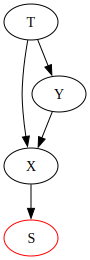

In [22]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

类似的情况也发生在我们以处理的中介变量为条件时。中介变量是介于处理与结果之间的变量，它实际上起着调节因果效应的作用。例如，再次假设你可以随机分配教育程度，但为了确保效果，你决定控制个体是否拥有白领工作。这样一来，这种条件设置再次导致了因果效应估计的偏误。这次偏误的产生并非因为它开启了带有碰撞器的前门路径，而是因为它关闭了处理作用的一个渠道。在我们的例子中，获得白领工作是更多教育带来更高收入的途径之一。通过控制这一变量，我们关闭了这一渠道，仅保留了教育对工资的直接影响。

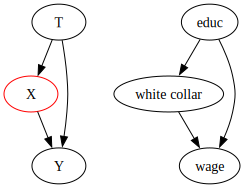

In [24]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

从潜在结果的角度论证，我们知道由于随机化处理，偏误为零 $E[Y_0|T=0] - E[Y_0|T=1] = 0$。然而，若以白领个体为条件，则存在 $E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$ 的情况。这是因为那些即便未受教育也能获得白领职位的人，可能比需要教育辅助才能获得相同职位者更为勤奋。同理，$E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]$ 因为那些即便受过教育仍未能获得白领职位的人，可能比未受教育也未获此职位者更不勤奋。

在本研究中，以中介变量为条件会引入负向偏误。这会使教育的影响显得低于实际水平。之所以如此，是因为因果效应本身为正。若效应为负，则对中介变量进行条件化处理将产生正向偏误。无论何种情况，此类条件化操作都会弱化实际效应。

用更通俗的话来说，假设你需要在两位求职者中为公司挑选一位。两人专业成就同样出色，但其中一位没有高等教育学历。你该选谁？当然应该选择那位没有高学历的候选人，因为他在条件不利的情况下仍取得了与另一位同等的成就。

![image.png](./images/04/three_bias.png)

## 核心要点

我们研究了图形模型作为一种语言，以更好地理解和表达因果关系概念。我们快速总结了图上条件独立性的规则，这帮助我们随后探讨了可能导致偏误的三种结构。

首先是混杂因素，当处理与结果存在未被考虑或控制的共同原因时发生。其次是由于对共同效应进行条件化而导致的选取偏误。第三种结构同样是选取偏误的一种形式，这次源于对中介变量的过度控制。即使处理是随机分配的，这种过度控制也可能导致偏误。选取偏误往往可以通过不作为来纠正，这正是其危险之处。由于我们倾向于采取行动，常将控制变量的方法视为巧妙之举，实则可能弊大于利。




## 参考文献
我愿将这一系列作品视为对 Joshua Angrist、Alberto Abadie 和 Christopher Walters 杰出计量经济学课程的致敬。第一部分的大部分思想源自他们在美国经济学会授课的内容。在艰难的 2020 年，正是观看他们的课程视频让我保持了理智。

 - [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
 - [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

 我还想引用 Angrist 的精彩著作。它们向我展示了计量经济学（他们称之为“Metrics”）不仅极为实用，而且充满乐趣。
 - [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com)
 - [Mastering ‘Metrics](https://www.masteringmetrics.com)

最后还要感谢 Miguel Hernán 和 Jamie Robins 的[《Causal Inference》](https://hsph.harvard.edu/profile/miguel-hernan/)一书。它是我在面对最棘手的因果问题时的可靠伙伴。

![img](./images/poetry.png)

## 参与贡献

**《Causal Inference for the Brave and True》** 是一本关于因果推断的开源教材，致力于以经济上可负担、认知上可理解的方式，普及这门“科学的统计基础”。全书基于 Python，仅使用自由开源软件编写，原始英文版本由 [Matheus Facure](https://github.com/matheusfacure) 编写与维护。

本书的中文版由黄文喆与许文立教授合作翻译，并托管在 [GitHub 中文主页](https://github.com/Wenzhe-Huang/python-causality-handbook-zh)。希望本地化的内容能帮助更多中文读者学习和掌握因果推断方法。

如果你觉得这本书对你有帮助，并希望支持该项目，可以前往 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true) 支持原作者。

如果你暂时不方便进行经济支持，也可以通过以下方式参与贡献：

* 修正错别字
* 提出翻译或表达建议
* 反馈你未能理解的部分内容

欢迎前往英文版或中文版仓库点击 [issues 区](https://github.com/matheusfacure/python-causality-handbook/issues) 或 [中文版 issues 区](https://github.com/Wenzhe-Huang/python-causality-handbook-zh/issues) 提出反馈。

最后，如果你喜欢这本书的内容，也请将其分享给可能感兴趣的朋友，并为项目在 GitHub 上点亮一颗星：[英文版仓库](https://github.com/matheusfacure/python-causality-handbook) / [中文版仓库](https://github.com/Wenzhe-Huang/python-causality-handbook-zh)。